In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [239]:
train = pd.read_csv('/content/TrainingDataset.csv')
train.head()

,Outcome_M1,Outcome_M2,Outcome_M3,Outcome_M4,Outcome_M5,Outcome_M6,Outcome_M7,Outcome_M8,Outcome_M9,Outcome_M10,Outcome_M11,Outcome_M12,Cat_1,Date_1,Quan_1,Quan_2,Quan_3,Quan_4,Date_2,Quan_5,Quan_6,Quan_7,Quan_8,Quan_9,Quan_10,Quan_11,Quan_12,Quan_13,Quan_14,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,Cat_8,Cat_9,Cat_10,Cat_11,Cat_12,...,Cat_480,Cat_481,Cat_482,Cat_483,Cat_484,Cat_485,Cat_486,Cat_487,Cat_488,Cat_489,Cat_490,Cat_491,Cat_492,Cat_493,Cat_494,Cat_495,Cat_496,Cat_497,Cat_498,Cat_499,Cat_500,Quan_26,Cat_501,Cat_502,Cat_503,Cat_504,Quan_27,Quan_28,Quan_29,Quan_30,Cat_505,Cat_506,Cat_507,Cat_508,Cat_509,Cat_510,Cat_511,Cat_512,Cat_513,Cat_514
0,10000,3000.0,8000.0,3000.0,3000.0,2000.0,2000.0,500.0,500.0,500.0,500.0,500.0,2,2485,918600,8300.0,76.0,538046.0,2025.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,114,183,2,2,0,0,0,4,1,0,...,0,1,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
1,8000,8000.0,2000.0,3000.0,2000.0,500.0,2000.0,2000.0,3000.0,500.0,500.0,500.0,2,2499,981000,7600.0,50.0,557614.0,1939.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,132,446,9,23,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,5000,15000.0,8000.0,3000.0,3000.0,2000.0,2000.0,2000.0,2000.0,500.0,500.0,500.0,2,1778,31600,8000.0,66.0,1119115.0,1488.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,8,11,2,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,35000,8000.0,8000.0,5000.0,5000.0,3000.0,2000.0,3000.0,6000.0,2000.0,2000.0,2000.0,2,2296,685300,7900.0,101.0,1416697.0,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,89,139,5,13,0,0,0,4,1,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
4,16000,2000.0,2000.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,1,2835,2657500,7600.0,81.0,58666.0,1934.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56,142,543,2,2,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1


In [240]:
train.shape

(751, 558)

1. i have decided to make predictions on Outcome_M12 variable based on the sale we have made in previous quarter and few other variable
2. ALso i have decided to fill my NAN with zero in sales columns and i am assuming that there were no sales in that particular months

In [241]:
train.head()

,Outcome_M1,Outcome_M2,Outcome_M3,Outcome_M4,Outcome_M5,Outcome_M6,Outcome_M7,Outcome_M8,Outcome_M9,Outcome_M10,Outcome_M11,Outcome_M12,Cat_1,Date_1,Quan_1,Quan_2,Quan_3,Quan_4,Date_2,Quan_5,Quan_6,Quan_7,Quan_8,Quan_9,Quan_10,Quan_11,Quan_12,Quan_13,Quan_14,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,Cat_8,Cat_9,Cat_10,Cat_11,Cat_12,...,Cat_480,Cat_481,Cat_482,Cat_483,Cat_484,Cat_485,Cat_486,Cat_487,Cat_488,Cat_489,Cat_490,Cat_491,Cat_492,Cat_493,Cat_494,Cat_495,Cat_496,Cat_497,Cat_498,Cat_499,Cat_500,Quan_26,Cat_501,Cat_502,Cat_503,Cat_504,Quan_27,Quan_28,Quan_29,Quan_30,Cat_505,Cat_506,Cat_507,Cat_508,Cat_509,Cat_510,Cat_511,Cat_512,Cat_513,Cat_514
0,10000,3000.0,8000.0,3000.0,3000.0,2000.0,2000.0,500.0,500.0,500.0,500.0,500.0,2,2485,918600,8300.0,76.0,538046.0,2025.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,114,183,2,2,0,0,0,4,1,0,...,0,1,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
1,8000,8000.0,2000.0,3000.0,2000.0,500.0,2000.0,2000.0,3000.0,500.0,500.0,500.0,2,2499,981000,7600.0,50.0,557614.0,1939.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,132,446,9,23,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,5000,15000.0,8000.0,3000.0,3000.0,2000.0,2000.0,2000.0,2000.0,500.0,500.0,500.0,2,1778,31600,8000.0,66.0,1119115.0,1488.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,8,11,2,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,35000,8000.0,8000.0,5000.0,5000.0,3000.0,2000.0,3000.0,6000.0,2000.0,2000.0,2000.0,2,2296,685300,7900.0,101.0,1416697.0,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,89,139,5,13,0,0,0,4,1,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
4,16000,2000.0,2000.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,1,2835,2657500,7600.0,81.0,58666.0,1934.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56,142,543,2,2,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1


In [242]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Columns: 558 entries, Outcome_M1 to Cat_514
dtypes: float64(37), int64(521)
memory usage: 3.2 MB


In [243]:
train = train.fillna(0)

I am creating new dataframe in which analysis and prediction of outcomeM12 sales will be done on the basis of all months of outcome, Date_1, Date_2,Cat_1, Quant_1 and I am considering date_1 and date_2 as continous variable

In [244]:
train_new = train[['Outcome_M8', 'Outcome_M9', 'Outcome_M10', 'Outcome_M11', 'Date_1', 'Date_2','Cat_1', 'Quan_1', 'Outcome_M12', 'Outcome_M7', 'Outcome_M6', 'Outcome_M5', 'Outcome_M4', 'Outcome_M3', 'Outcome_M2', 'Outcome_M1']]

In [245]:
train_new.isnull().sum()

Outcome_M8     0
Outcome_M9     0
Outcome_M10    0
Outcome_M11    0
Date_1         0
Date_2         0
Cat_1          0
Quan_1         0
Outcome_M12    0
Outcome_M7     0
Outcome_M6     0
Outcome_M5     0
Outcome_M4     0
Outcome_M3     0
Outcome_M2     0
Outcome_M1     0
dtype: int64

In [246]:
train_new.shape

(751, 16)

###Exploratory data Analysis

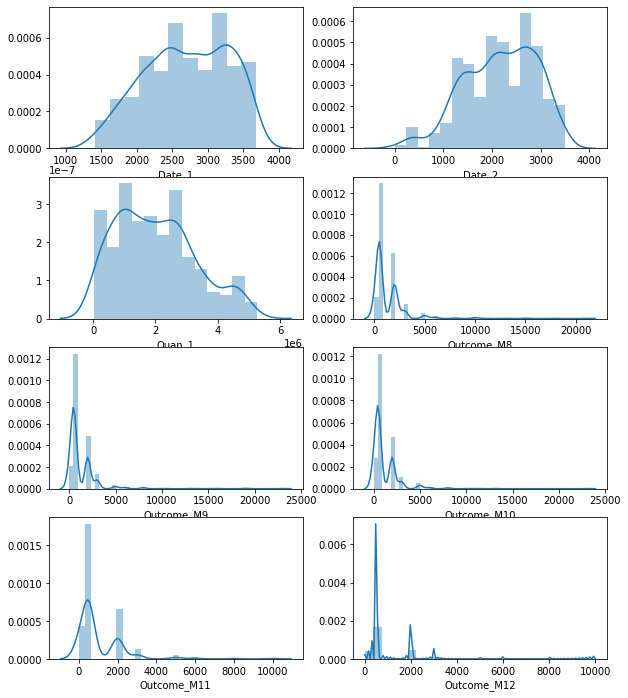

In [247]:
plt.figure(figsize=(10,12))
plt.subplot(4,2,1)
sns.distplot(train_new['Date_1'])
plt.subplot(4,2,2)
sns.distplot(train_new['Date_2'])
plt.subplot(4,2,3)
sns.distplot(train_new['Quan_1'])
plt.subplot(4,2,4)
sns.distplot(train_new['Outcome_M8'])
plt.subplot(4,2,5)
sns.distplot(train_new['Outcome_M9'])
plt.subplot(4,2,6)
sns.distplot(train_new['Outcome_M10'])
plt.subplot(4,2,7)
sns.distplot(train_new['Outcome_M11'])
plt.subplot(4,2,8)
sns.distplot(train_new['Outcome_M12'])

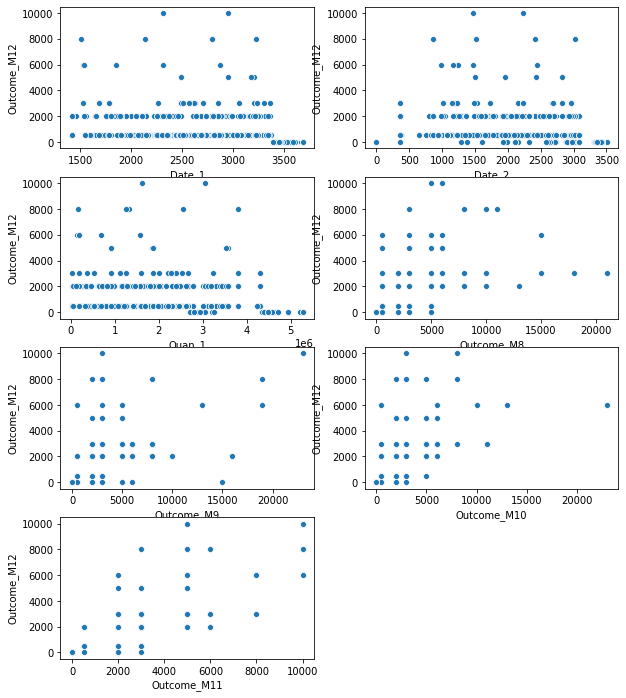

In [248]:
plt.figure(figsize=(10,12))
plt.subplot(4,2,1)
sns.scatterplot(train_new['Date_1'], train_new['Outcome_M12'])
plt.subplot(4,2,2)
sns.scatterplot(train_new['Date_2'],  train_new['Outcome_M12'])
plt.subplot(4,2,3)
sns.scatterplot(train_new['Quan_1'],  train_new['Outcome_M12'])
plt.subplot(4,2,4)
sns.scatterplot(train_new['Outcome_M8'],  train_new['Outcome_M12'])
plt.subplot(4,2,5)
sns.scatterplot(train_new['Outcome_M9'],  train_new['Outcome_M12'])
plt.subplot(4,2,6)
sns.scatterplot(train_new['Outcome_M10'], train_new['Outcome_M12'])
plt.subplot(4,2,7)
sns.scatterplot(train_new['Outcome_M11'],  train_new['Outcome_M12'])

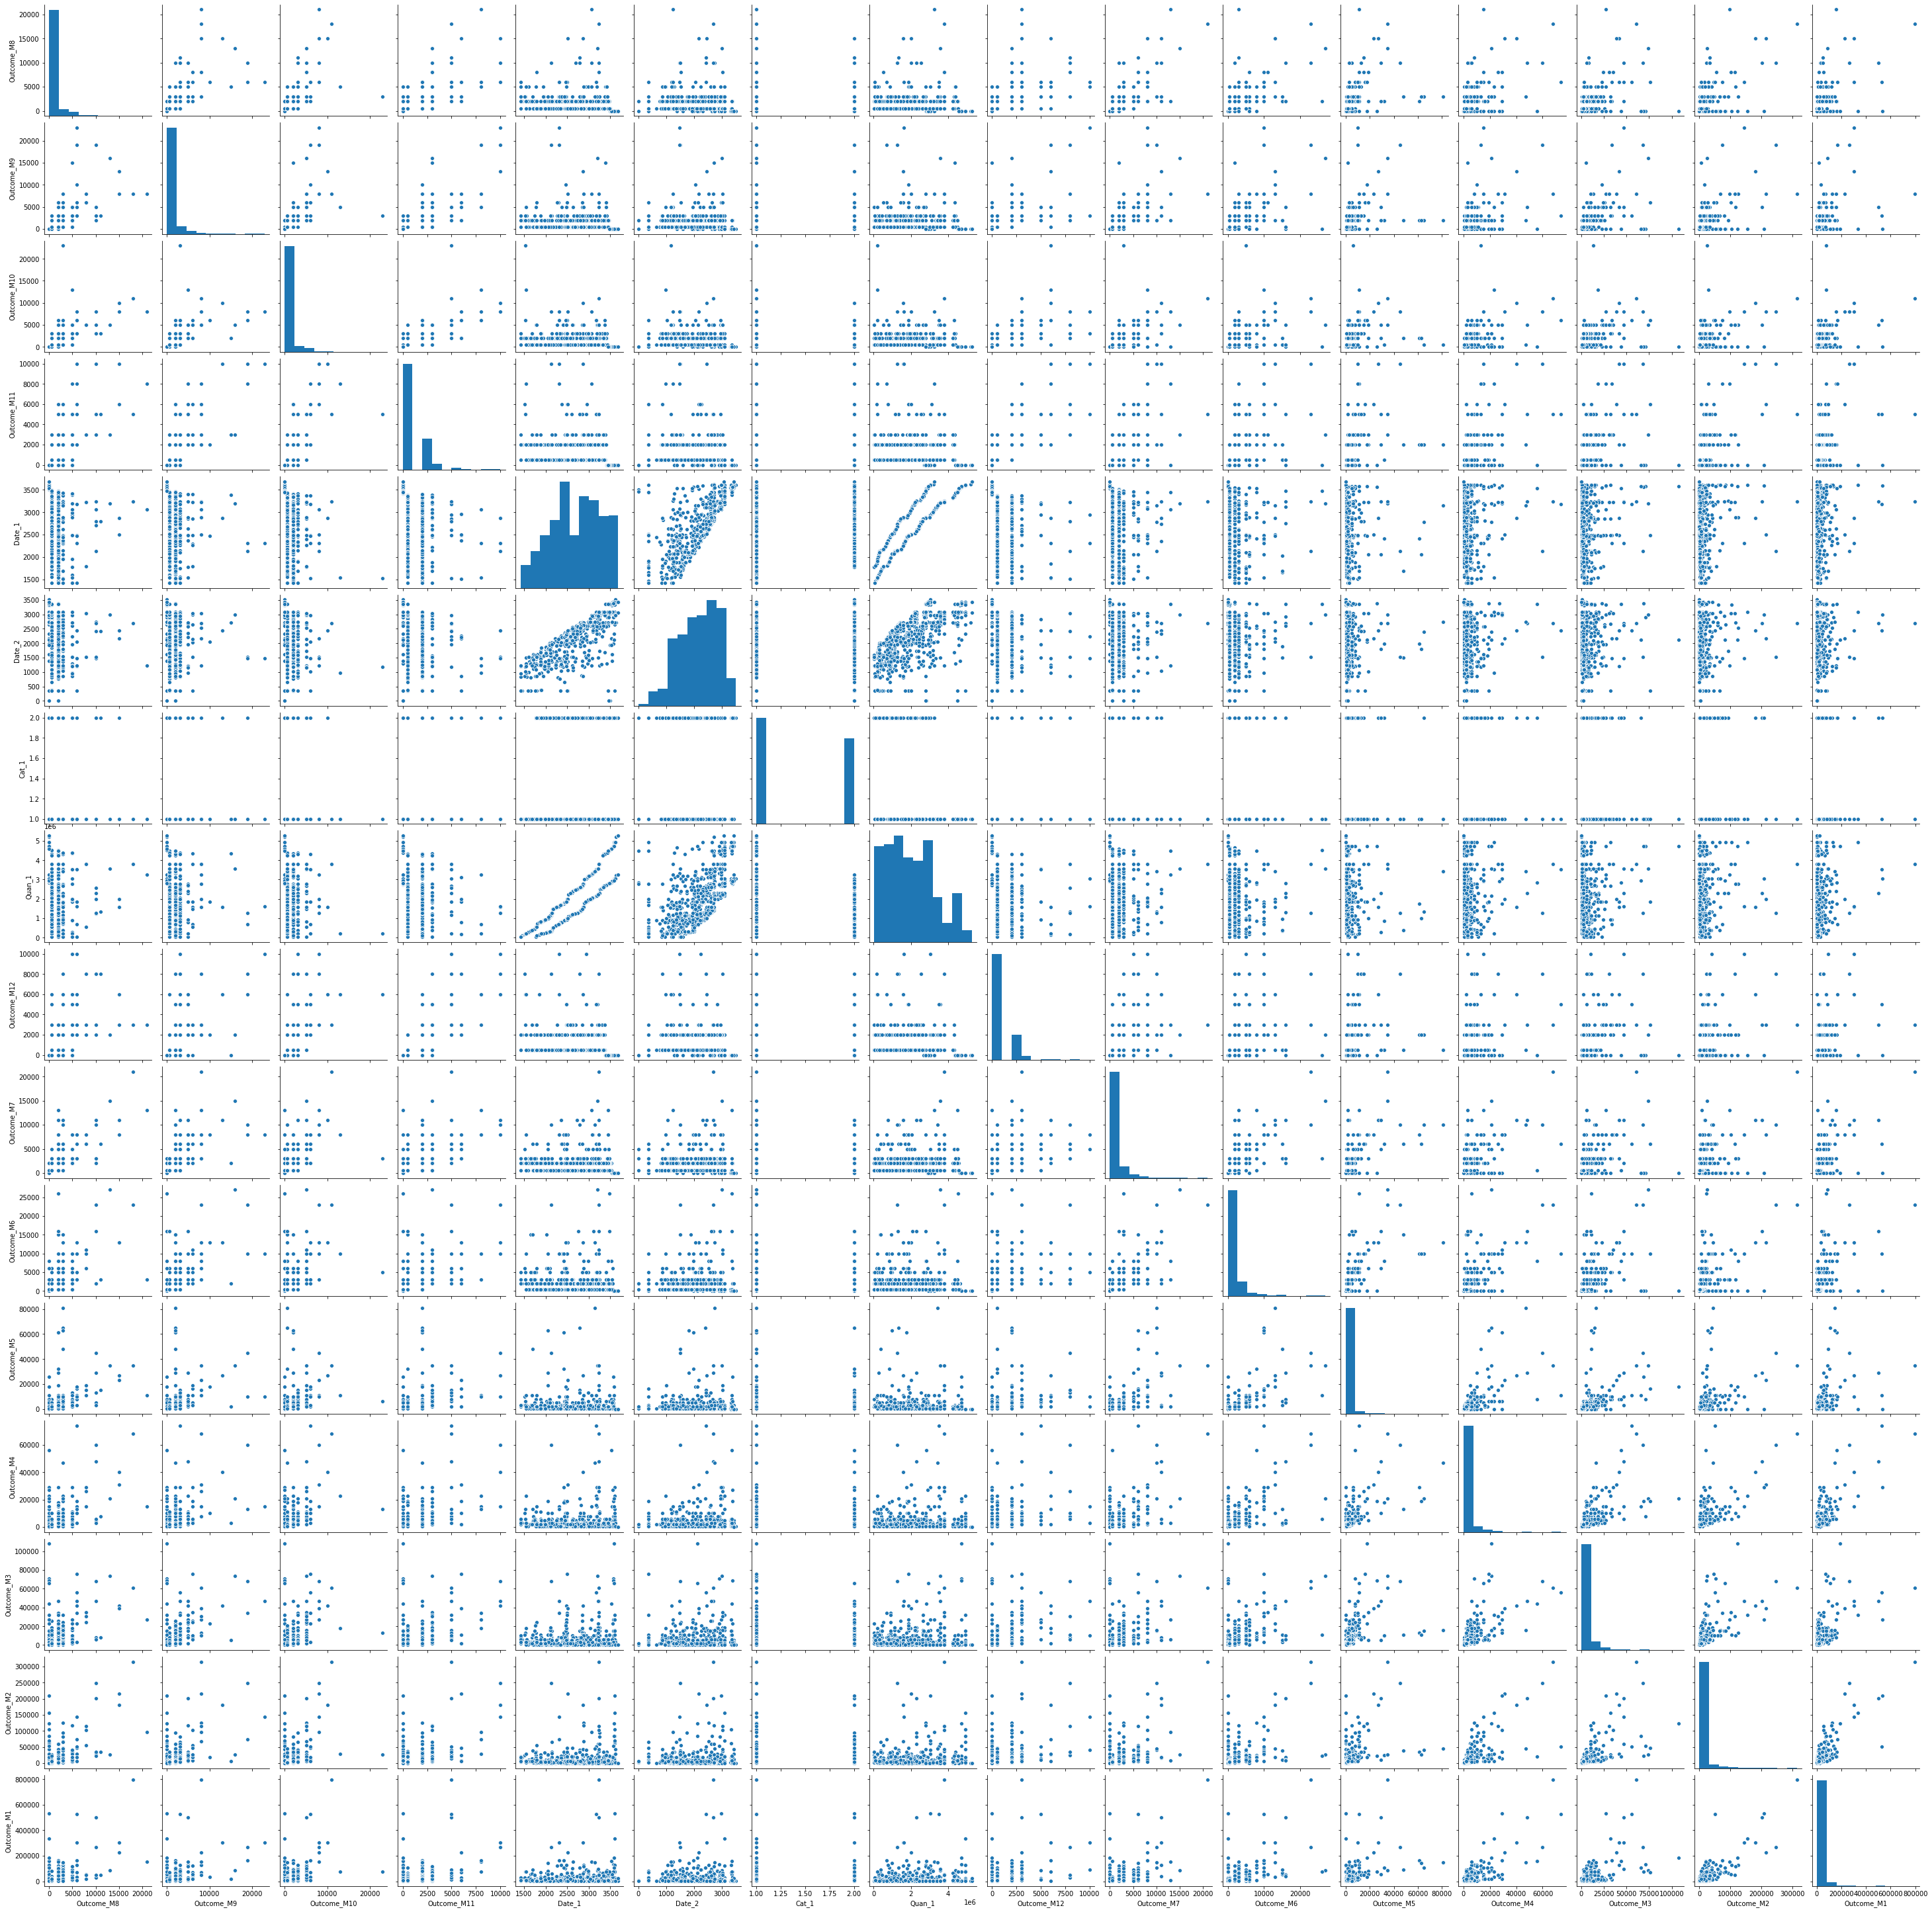

In [249]:
sns.pairplot(train_new)

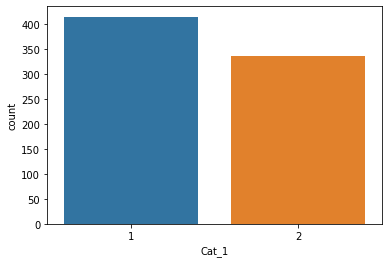

In [212]:
sns.countplot(train_new['Cat_1'])

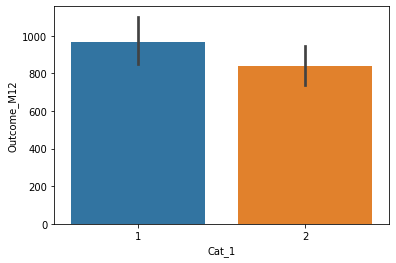

In [213]:
sns.barplot(train_new['Cat_1'], train_new['Outcome_M12'])

###Hyphothesis Test

Hypothesis done on the date variable and quantity vraiable:
Ho = "there is no association between Date_1 and Outcome_M12"
HA= "there is association between Date_1 and Outcome_M12"

In [214]:
from scipy.stats import ttest_ind
import numpy as np

ttest,pval = ttest_ind(train_new['Date_1'],train_new['Outcome_M12'])
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

p-value 2.7651814129223563e-214
we reject null hypothesis


Hypothesis done on the date variable and quantity vraiable:
Ho = "there is no association between Quan_1 and Outcome_M12"
HA= "there is  association between Quan_1 and Outcome_M12"

In [215]:
from scipy.stats import ttest_ind
import numpy as np

ttest,pval = ttest_ind(train_new['Date_2'],train_new['Outcome_M12'])
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

p-value 3.8659986622548445e-113
we reject null hypothesis


In [216]:
#Hypothesis done on the date variable and quantity vraiable:
#Ho = "there is no association between Quan_1 and Outcome_M12"
#HA= "there is  association between Quan_1 and Outcome_M12"
from scipy.stats import ttest_ind
import numpy as np

ttest,pval = ttest_ind(train_new['Quan_1'],train_new['Outcome_M12'])
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

p-value 9.582388004982576e-267
we reject null hypothesis


In [217]:
#Hypothesis done on the date variable and quantity vraiable:
#Ho = "there is no association between Outcome_M11 and Outcome_M12"
#HA= "there is  association between Outcome_M11 and Outcome_M12"

from scipy.stats import ttest_ind
import numpy as np

ttest,pval = ttest_ind(train_new['Outcome_M11'],train_new['Outcome_M12'])
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")


p-value 0.08034569143118613
we accept null hypothesis


In [218]:
#Hypothesis done on the date variable and quantity vraiable:
#Ho = "there is no association between Outcome_M10 and Outcome_M12"
#HA= "there is  association between Outcome_M10 and Outcome_M12"

from scipy.stats import ttest_ind
import numpy as np

ttest,pval = ttest_ind(train_new['Outcome_M10'],train_new['Outcome_M12'])
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")



p-value 0.0009484702106897914
we reject null hypothesis


In [219]:
#Hypothesis done on the date variable and quantity vraiable:
#Ho = "there is no association between Outcome_M9 and Outcome_M12"
#HA= "there is  association between Outcome_M9 and Outcome_M12"

from scipy.stats import ttest_ind
import numpy as np

ttest,pval = ttest_ind(train_new['Outcome_M9'],train_new['Outcome_M12'])
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")



p-value 1.9368645243445654e-05
we reject null hypothesis


In [220]:
#Hypothesis done on the date variable and quantity vraiable:
#Ho = "there is no association between Outcome_M8 and Outcome_M12"
#HA= "there is  association between Outcome_M8 and Outcome_M12"

from scipy.stats import ttest_ind
import numpy as np

ttest,pval = ttest_ind(train_new['Outcome_M8'],train_new['Outcome_M12'])
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")



p-value 4.352414548216074e-08
we reject null hypothesis


In [250]:
#Hypothesis done on the date variable and quantity vraiable:
#Ho = "there is no association between Outcome_M7 and Outcome_M12"
#HA= "there is  association between Outcome_M7 and Outcome_M12"

from scipy.stats import ttest_ind
import numpy as np

ttest,pval = ttest_ind(train_new['Outcome_M7],train_new['Outcome_M12'])
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")



p-value 1.0120937368442902e-16
we reject null hypothesis


In [251]:
#Hypothesis done on the date variable and quantity vraiable:
#Ho = "there is no association between Outcome_M6 and Outcome_M12"
#HA= "there is  association between Outcome_M6 and Outcome_M12"

from scipy.stats import ttest_ind
import numpy as np

ttest,pval = ttest_ind(train_new['Outcome_M6'],train_new['Outcome_M12'])
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")



p-value 1.291714245581652e-17
we reject null hypothesis


In [252]:
#Hypothesis done on the date variable and quantity vraiable:
#Ho = "there is no association between Outcome_M5 and Outcome_M12"
#HA= "there is  association between Outcome_M5 and Outcome_M12"

from scipy.stats import ttest_ind
import numpy as np

ttest,pval = ttest_ind(train_new['Outcome_M5'],train_new['Outcome_M12'])
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

p-value 3.6467055054988144e-14
we reject null hypothesis


In [253]:
#Hypothesis done on the date variable and quantity vraiable:
#Ho = "there is no association between Outcome_M4 and Outcome_M12"
#HA= "there is  association between Outcome_M4 and Outcome_M12"

from scipy.stats import ttest_ind
import numpy as np

ttest,pval = ttest_ind(train_new['Outcome_M4'],train_new['Outcome_M12'])
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

p-value 9.85559478986286e-24
we reject null hypothesis


In [254]:
#Hypothesis done on the date variable and quantity vraiable:
#Ho = "there is no association between Outcome_M3 and Outcome_M12"
#HA= "there is  association between Outcome_M3 and Outcome_M12"

from scipy.stats import ttest_ind
import numpy as np

ttest,pval = ttest_ind(train_new['Outcome_M3'],train_new['Outcome_M12'])
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

p-value 5.22535633351728e-29
we reject null hypothesis


In [255]:
#Hypothesis done on the date variable and quantity vraiable:
#Ho = "there is no association between Outcome_M2 and Outcome_M12"
#HA= "there is  association between Outcome_M2 and Outcome_M12"

from scipy.stats import ttest_ind
import numpy as np

ttest,pval = ttest_ind(train_new['Outcome_M2'],train_new['Outcome_M12'])
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

p-value 7.360461453322306e-24
we reject null hypothesis


In [256]:
#Hypothesis done on the date variable and quantity vraiable:
#Ho = "there is no association between Outcome_M1 and Outcome_M12"
#HA= "there is  association between Outcome_M1 and Outcome_M12"

from scipy.stats import ttest_ind
import numpy as np

ttest,pval = ttest_ind(train_new['Outcome_M1'],train_new['Outcome_M12'])
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

p-value 3.607164105906626e-22
we reject null hypothesis


Now its time to do hypothetical testing using categoric variable Cat_1 and we will check the significance if Cat_1 on Outcome_M12

H0- There is no association between Cat_1 and Outcome_M12
HA- There is association between Cat_1 and Outcome_M12

In [257]:
train_new['Cat_1'].value_counts()

1    415
2    336
Name: Cat_1, dtype: int64

In [258]:
from scipy import stats
grps = pd.unique(train_new['Cat_1'].values)
d_data = {grp:train_new['Outcome_M12'][train_new['Cat_1'] == grp] for grp in grps}
 
F, p = stats.f_oneway(d_data.get(1), d_data.get(2))
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  0.13870273616698955
accept null hypothesis


From the above hypothesis, i concluded that OutcomeMon12 sales is impacted by Date_1, Date_2, Quan_1 so much so i decided to build my model over these variables

In [259]:
X = train_new.drop(columns= ['Outcome_M12', 'Outcome_M11', 'Cat_1'], axis =1)
y = train_new['Outcome_M12']

###Model scaling with train test split and model building

In [260]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state =100)

In [262]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((600, 13), (151, 13), (600,), (151,))

In [263]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred = model_linear.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
SSE = np.sum((y_pred-y_test)**2)
SST = np.sum((y_test-np.mean(y_train))**2)
r2_test = 1 - SSE/SST
print("Test RMSE : ", rmse_test)
print("Test SSE : ", SSE)
print("Test SST : ", SST)
print("Test R2 : ", r2_test)

Test RMSE :  804.6348447145954
Test SSE :  97763022.23266105
Test SST :  154722943.75
Test R2 :  0.3681414025406232


The above model explains a very small variance

In [264]:
model_RF = RandomForestRegressor()
model_RF.fit(X_train, y_train)
y_pred = model_RF.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
SSE = np.sum((y_pred-y_test)**2)
SST = np.sum((y_test-np.mean(y_train))**2)
r2_test = 1 - SSE/SST
print("Test RMSE : ", rmse_test)
print("Test SSE : ", SSE)
print("Test SST : ", SST)
print("Test R2 : ", r2_test)

Test RMSE :  697.2701026334702
Test SSE :  73414025.0
Test SST :  154722943.75
Test R2 :  0.5255130026570478


Model now covers 52 percent of variance with Random Forest Regressor

In [265]:
model_GB = GradientBoostingRegressor()
model_GB.fit(X_train, y_train)
y_pred = model_GB.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
SSE = np.sum((y_pred-y_test)**2)
SST = np.sum((y_test-np.mean(y_train))**2)
r2_test = 1 - SSE/SST
print("Test RMSE : ", rmse_test)
print("Test SSE : ", SSE)
print("Test SST : ", SST)
print("Test R2 : ", r2_test)

Test RMSE :  686.7212381398788
Test SSE :  71209494.89576757
Test SST :  154722943.75
Test R2 :  0.5397612456829464


Model now covers 53 percent of variance with Gradient Boosting Regressor and slight improvement in the model can be seen.

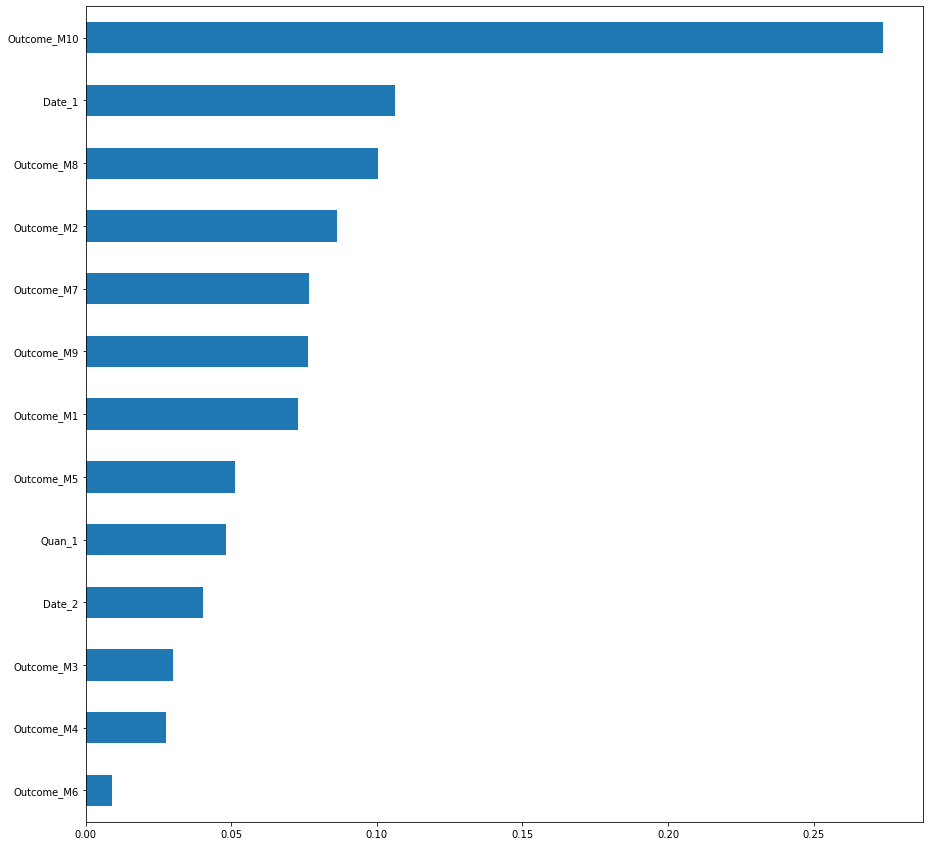

In [266]:
data = pd.Series(model_RF.feature_importances_, index = X_train.columns)
plt.figure(figsize=(15,15))
data.sort_values(ascending=True, inplace=True)
data.plot.barh()

Slight Improvents by selecting more good features

In [267]:
X_train = X_train.drop(columns=['Outcome_M6', 'Outcome_M4', 'Outcome_M3', 'Date_2'], axis =1)
X_test = X_test.drop(columns=['Outcome_M6', 'Outcome_M4', 'Outcome_M3', 'Date_2'], axis =1)

In [270]:
model_GB_new = GradientBoostingRegressor()
model_GB_new.fit(X_train, y_train)
y_pred = model_GB_new.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
SSE = np.sum((y_pred-y_test)**2)
SST = np.sum((y_test-np.mean(y_train))**2)
r2_test = 1 - SSE/SST
print("Test RMSE : ", rmse_test)
print("Test SSE : ", SSE)
print("Test SST : ", SST)
print("Test R2 : ", r2_test)

Test RMSE :  683.3232132416144
Test SSE :  70506522.67698157
Test SST :  154722943.75
Test R2 :  0.5443046715107398
